# Insurance Cost Data

### Step 1: Data Preprocessing

In [1]:
import pandas as pd

In [2]:
insurance = pd.read_csv(r'D:\Mitsu\MS-ISM\508 - Data Mining I\Week3\DataSet\insurance.csv')

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.shape

(1338, 7)

In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Step 2: Correlation

In [7]:
#insurance.corr()
corr = insurance.corr()
corr

C:\Users\Mitsu\AppData\Local\Temp\ipykernel_6820\3266196788.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = insurance.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [8]:
import seaborn as sns

In [9]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Correlation Heatmap')

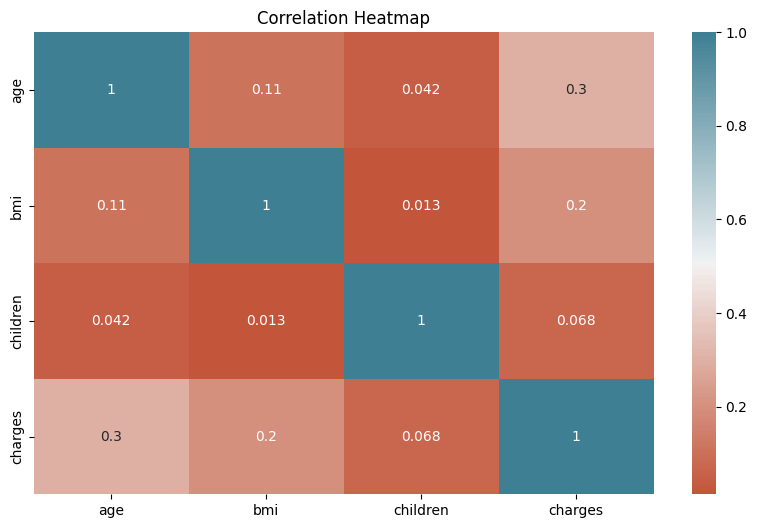

In [10]:
plt.figure(figsize=(10, 6))
#sns.heatmap(insurance.corr(), annot=True, cmap=sns.diverging_palette(20, 220, n=200))
sns.heatmap(corr, annot = True, cmap = sns.diverging_palette(20, 220, n=200))
plt.title('Correlation Heatmap')

### Step 3: Train-test split

In [11]:
#X = pd.get_dummies(insurance[['age', 'bmi', 'children', 'smoker', 'sex', 'region']], drop_first=True)
X = pd.get_dummies(insurance.iloc[ : , 0:6], drop_first = True)

#X = pd.get_dummies(insurance.iloc[ : , 0:7], drop_first = True)
print(X)

      age     bmi  children  sex_male  smoker_yes  region_northwest  \
0      19  27.900         0         0           1                 0   
1      18  33.770         1         1           0                 0   
2      28  33.000         3         1           0                 0   
3      33  22.705         0         1           0                 1   
4      32  28.880         0         1           0                 1   
...   ...     ...       ...       ...         ...               ...   
1333   50  30.970         3         1           0                 1   
1334   18  31.920         0         0           0                 0   
1335   18  36.850         0         0           0                 0   
1336   21  25.800         0         0           0                 0   
1337   61  29.070         0         0           1                 1   

      region_southeast  region_southwest  
0                    0                 1  
1                    1                 0  
2                 

In [12]:
y = insurance[['charges']]

2. Then, use train_test_split to divide data into X_train, X_test, y_train, y_test

#### code for reference

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
X_train.shape

(1070, 8)

In [16]:
#answer 3)
#answer 4) r, c = 1070, 3 or 5probs

### Step 4: Train a linear regression model on training set

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
insurance_regressor = LinearRegression()
insurance_regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
coeff_df = pd.DataFrame(insurance_regressor.coef_, columns=X.columns)
coeff_df

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,253.7005,335.962814,436.910121,-15.463728,23605.017267,-260.132732,-913.278834,-761.948706


In [20]:
import statsmodels.api as sm

In [21]:
X_train2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     371.7
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          1.85e-301
Time:                        23:31:14   Log-Likelihood:                -10851.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1061   BIC:                         2.177e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.183e+04   1127.759  

### Step 5: Evaluate the model on test data

In [22]:
y_train_pred = insurance_regressor.predict(X_train)
y_test_pred = insurance_regressor.predict(X_test)

In [23]:
from sklearn import metrics

In [24]:
import numpy as np

In [25]:
print('RMSE on test data: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('RMSE on training data: ', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

RMSE on test data:  5641.626558850189
RMSE on training data:  6140.157418880165


In [26]:
from sklearn.metrics import r2_score

In [27]:
r_sq_test = r2_score(y_test, y_test_pred)
print('R squared on test set: ', r_sq_test)

R squared on test set:  0.7999876970680434


In [28]:
r_sq_train = r2_score(y_train, y_train_pred)
print('R squared on training set: ', r_sq_train)

R squared on training set:  0.7370262574551634
